In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
dataset = pd.read_csv('/content/sample_data/Ford Car Price Prediction.csv')

In [183]:
dataset.shape

(17966, 9)

In [184]:
dataset.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,9
mpg,0
engineSize,0


In [185]:
dataset = dataset.dropna()
dataset.shape

(17957, 9)

In [186]:
dataset = dataset.drop_duplicates()
dataset.shape

(17803, 9)

In [187]:
X=dataset.drop(['price'],axis=1)
y=dataset['price']

In [188]:
print(X)

           model  year transmission  mileage fuelType    tax   mpg  engineSize
9          Focus  2018       Manual    48141   Petrol  145.0  61.4         1.0
10        Fiesta  2018       Manual    18803   Petrol  145.0  56.5         1.0
11      EcoSport  2018       Manual    12065   Petrol  145.0  54.3         1.0
12        Fiesta  2017       Manual    20978   Petrol    0.0  65.7         1.0
13          Kuga  2018    Semi-Auto     9002   Diesel  145.0  54.3         2.0
...          ...   ...          ...      ...      ...    ...   ...         ...
17961      B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4
17962      B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0
17963      Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6
17964         KA  2018       Manual     5007   Petrol  145.0  57.7         1.2
17965      Focus  2015       Manual     5007   Petrol   22.0  57.7         1.0

[17803 rows x 8 columns]


In [189]:
print(y)

9        10000
10       11561
11       13500
12       11000
13       17999
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17803, dtype: int64


In [190]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
category_of_cars = ['model','transmission','fuelType']
for i in category_of_cars:
  X[i]=le.fit_transform(X[i])

In [191]:
print(X)

       model  year  transmission  mileage  fuelType    tax   mpg  engineSize
9          6  2018             1    48141         4  145.0  61.4         1.0
10         5  2018             1    18803         4  145.0  56.5         1.0
11         2  2018             1    12065         4  145.0  54.3         1.0
12         5  2017             1    20978         4    0.0  65.7         1.0
13        13  2018             2     9002         0  145.0  54.3         2.0
...      ...   ...           ...      ...       ...    ...   ...         ...
17961      0  2017             1    16700         4  150.0  47.1         1.4
17962      0  2014             1    40700         4   30.0  57.7         1.0
17963      6  2015             1     7010         0   20.0  67.3         1.6
17964     11  2018             1     5007         4  145.0  57.7         1.2
17965     23  2015             1     5007         4   22.0  57.7         1.0

[17803 rows x 8 columns]


In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [193]:
print(X_train)

       model  year  transmission  mileage  fuelType    tax   mpg  engineSize
6055       2  2015             1    24409         4  125.0  52.3         1.0
6147      13  2018             1    20026         0  145.0  54.3         1.5
7693       2  2017             1     7417         0  145.0  64.2         1.5
9259       5  2019             1     5323         4  150.0  58.9         1.0
5640       5  2015             1    50437         0    0.0  76.4         1.5
...      ...   ...           ...      ...       ...    ...   ...         ...
11086     12  2019             1      327         4  145.0  47.9         1.2
17451      6  2012             1    56000         4   30.0  56.5         1.0
5229       6  2014             1    11254         4   30.0  56.5         1.0
12313      6  2019             1     7600         4  145.0  58.9         1.0
245        6  2019             0    11045         4  145.0  41.5         1.0

[14242 rows x 8 columns]


In [194]:
print(X_test)

       model  year  transmission  mileage  fuelType    tax   mpg  engineSize
11063      5  2017             1    18001         4   20.0  62.8         1.0
8221      13  2015             2    65000         0  150.0  52.3         2.0
9509       5  2017             1    13029         4    0.0  65.7         1.0
13985      6  2016             1    43000         0    0.0  74.3         1.5
5479       6  2013             1    65824         4  150.0  47.9         1.6
...      ...   ...           ...      ...       ...    ...   ...         ...
6594       6  2016             1    12376         4   20.0  60.1         1.0
6298      12  2018             1    20867         4  145.0  57.7         1.2
2369       5  2018             1    10357         4  145.0  65.7         1.0
17060     11  2014             1    43001         4   30.0  57.7         1.2
13137      5  2019             0      161         4  145.0  48.7         1.0

[3561 rows x 8 columns]


In [195]:
print(y_train)

6055      7999
6147     16695
7693     10200
9259     15000
5640      6690
         ...  
11086    11790
17451     5400
5229      8391
12313    17000
245      15998
Name: price, Length: 14242, dtype: int64


In [196]:
print(y_test)

11063    11399
8221      9799
9509      8900
13985     9400
5479      5391
         ...  
6594     10080
6298      8500
2369     11200
17060     4250
13137    19995
Name: price, Length: 3561, dtype: int64


In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

<Axes: >

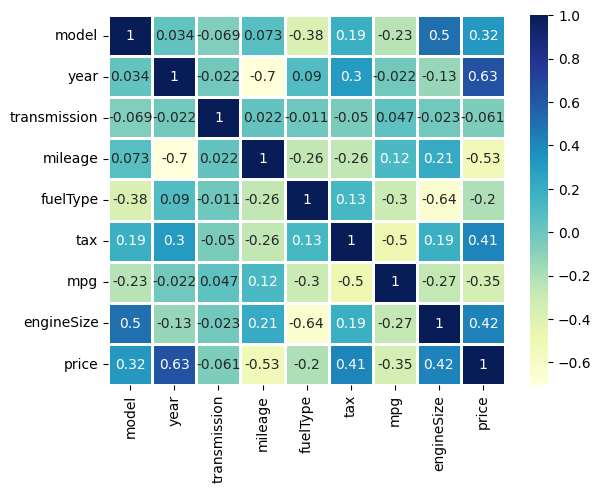

In [198]:
import seaborn as sns

Xy_train = pd.concat([X_train, y_train], axis=1)
sns.heatmap(Xy_train.corr(),annot=True,linewidths=1, cmap = 'YlGnBu')

In [199]:
columns_to_drop = ['year']

X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [201]:
print("KNeighbors method accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNeighbors method accuracy: 0.02


In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)

print("Linear Regression R^2 accuracy: {:.2f}".format(r2))

Linear Regression R^2 accuracy: 0.75


In [203]:
threshold = y.median()
y_categorical = np.where(y >= threshold, 1, 0)

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [205]:
threshold = y.median()
y_categorical = np.where(y >= threshold, 1, 0)

In [206]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categorical, test_size=0.2, random_state=1)

In [207]:
sc = StandardScaler()
X_train_cat_scaled = sc.fit_transform(X_train_cat)
X_test_cat_scaled = sc.transform(X_test_cat)

In [208]:
log_reg = LogisticRegression()
log_reg.fit(X_train_cat_scaled, y_train_cat)

LogisticRegression()

In [209]:
y_pred_cat = log_reg.predict(X_test_cat_scaled)

In [210]:
accuracy = accuracy_score(y_test_cat, y_pred_cat)
print(f"Logistic Regression accuracy: {accuracy:.2f}")

Logistic Regression accuracy: 0.87


In [211]:
print(confusion_matrix(y_test_cat, y_pred_cat))
print(classification_report(y_test_cat, y_pred_cat))

[[1580  218]
 [ 238 1525]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1798
           1       0.87      0.87      0.87      1763

    accuracy                           0.87      3561
   macro avg       0.87      0.87      0.87      3561
weighted avg       0.87      0.87      0.87      3561

